# Gentrification in Crown Heights Brooklyn

### What is Gentrification?
- Gentrification is the process of urban renewal of poor, underserved areas. 
- This is accompanied by the influx of people into the poorer neighborhoods. 
- Over time the services available in the area improve and the cost of living increases. 
- This results, poorer people who cannot afford to live there will be forced to move to poorer or more affordable neighborhoods.

- Gentrification can benefit an area by:
 - decreasing crime rate
 - increasing property and home values
 
- Gentrification can have negative consequence on area: 
 - forcing out low-income residents
 - leading to heightened difference in race and class
 
This process, gentrification, changes areas drastically over the course of several years.
We decided to look into gentrification of Crown Heights Brooklyn, New York, since Crown Heights, is among the 20 most gentrified areas in the US.



## Data description
### To study the problem we used multiple datasets which include:
 - **NYPD Complaint Data Historic**: This dataset includes crimes reported to the New  York City Police Department (NYPD) from 2006 to 2017.
  -  We used it to  provide insight of the crime rate in Crown Heights from 2006 through 2017.
  -  The dataset has 6,500,870 reported complaint including violations, misdemeanors, and felonies in the entire metro city area in this period.
 - **School Demographics**: Student demographic and enrollment data by school from 2005-06 through 2011-12 and 2013-14 through 2017-18. 
  -  We used school demographic snapshots to provide demographic population change information in Crown Heights as it is hard to find the demographics of the population in a certain area.
  -  The data shows there were 63 schools in this distric. Some of them closed due to poor performance and then merged with other school.
  -  The school demograpics data provides percentage of most of the racial groups and percentage of proverty class in each school.
 
 - **Brooklyn Home Sales**: This dataset contains home sale price in Brooklyn from 2003 to 2017. There were 390,883 houses sold in this Brooklyn.
  -  We used the to document price changes in Crown Heights from 2003 to 2017.
  -  The average house price was calcuated per year.



## Data Import

In [ ]:
## Helper functions
%matplotlib inline
import os
import sqlite3
from sqlite3 import Error
import gzip
import pandas as pd

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

pd.set_option('display.max_columns', None)

### Create database

In [ ]:
# Creating lab2.db 
db_file = 'Brooklyn.db'
conn = create_connection(db_file, delete_db=True)
conn.close()


### Create Table in SQL and insert data in each table

In [ ]:
conn = sqlite3.connect("Brooklyn.db")
df = pd.read_csv('2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv')
# df = pd.read_csv('2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv', error_bad_lines=False)
df.to_sql('School_Demographics06_12', conn, if_exists='append', index=False)

conn.close()

In [ ]:
conn = sqlite3.connect("Brooklyn.db")
df = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv')
df = df.rename(columns={"Year": "schoolyear", "% Asian": "asian_per", "% Black": "black_per", "% Hispanic": "hispanic_per", "% Multiple Race Categories Not Represented": "MRCNR_per", 
                   "% White": "white_per", "% Students with Disabilities": "SwD_per", "% English Language Learners": "ell_per", "% Poverty": "Poverty_per"})
df.to_sql('School_Demographics13_18', conn, if_exists='append', index=False)

conn.close()

In [ ]:
conn = sqlite3.connect("Brooklyn.db")
df = pd.read_csv('brooklyn_sales_map.csv', low_memory=False)
# df = df.loc[:,~df.columns.duplicated()]

df.to_sql('House_Sales', conn, if_exists='append', index=False)

conn.close()

In [ ]:
conn = sqlite3.connect("Brooklyn.db")
df = pd.read_csv('School_Location.csv', low_memory=False)
# df = df.loc[:,~df.columns.duplicated()]

df.to_sql('School_Location', conn, if_exists='append', index=False)

conn.close()

In [ ]:
conn = sqlite3.connect("Brooklyn.db")
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv', low_memory=False)
# df = df.loc[:,~df.columns.duplicated()]

df.to_sql('Crime', conn, if_exists='append', index=False)

conn.close()

### Getting the  Data

In [ ]:
## Crime Data count only 'MISDEMEANOR', 'FELONY' for Crown Heights

sql1 ="""select count(*) "Num_Crime" from crime where rpt_dt like ? and 
        Latitude > 40.661069 and Latitude < 40.681040 and Longitude < -73.919929 and Longitude > -73.964345 
        and LAW_CAT_CD in ('MISDEMEANOR', 'FELONY') limit 5; """
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df1 = pd.DataFrame(columns=['Num_Crime'])
cyears = ['%2006','%2007','%2008','%2009','%2010','%2011','%2012','%2013','%2014','%2015','%2016','%2017']
cyear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i,v in enumerate(cyears):
    df1 = df1.append(pd.read_sql_query(sql1, conn, params = ([v])), ignore_index=False)
    df1.rename(index={0: cyear[i]}, inplace = True)
conn.close()

In [ ]:
## Crime Data count only 'MISDEMEANOR', 'FELONY' for Brooklyn Heights

sql11 ="""select count(*) "Num_Crime" from crime where rpt_dt like ? and 
        Latitude > 40.689590 and Latitude < 40.704020 and Longitude < -73.990815 and Longitude > -74.002048 
        and LAW_CAT_CD in ('MISDEMEANOR', 'FELONY') limit 5; """
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df11 = pd.DataFrame(columns=['Num_Crime'])
cyears = ['%2006','%2007','%2008','%2009','%2010','%2011','%2012','%2013','%2014','%2015','%2016','%2017']
cyear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i,v in enumerate(cyears):
    df11 = df11.append(pd.read_sql_query(sql11, conn, params = ([v])), ignore_index=False)
    df11.rename(index={0: cyear[i]}, inplace = True)
conn.close()

In [ ]:
## Crime Data count only 'MISDEMEANOR', 'FELONY' for Brownsville

sql12 ="""select count(*) "Num_Crime" from crime where rpt_dt like ? and 
        Latitude > 40.651297 and Latitude < 40.676721 and Longitude < -73.900341 and Longitude > -73.924674 
        and LAW_CAT_CD in ('MISDEMEANOR', 'FELONY') limit 5; """
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df12 = pd.DataFrame(columns=['Num_Crime'])
cyears = ['%2006','%2007','%2008','%2009','%2010','%2011','%2012','%2013','%2014','%2015','%2016','%2017']
cyear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i,v in enumerate(cyears):
    df12 = df12.append(pd.read_sql_query(sql12, conn, params = ([v])), ignore_index=False)
    df12.rename(index={0: cyear[i]}, inplace = True)
conn.close()

In [ ]:
## Crime Data count only 'MISDEMEANOR', 'FELONY' for East Williamsburg

sql13 ="""select count(*) "Num_Crime" from crime where rpt_dt like ? and 
        Latitude > 40.703146 and Latitude < 40.725916 and Longitude < -73.920845 and Longitude > -73.942260 
        and LAW_CAT_CD in ('MISDEMEANOR', 'FELONY') limit 5; """
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df13 = pd.DataFrame(columns=['Num_Crime'])
cyears = ['%2006','%2007','%2008','%2009','%2010','%2011','%2012','%2013','%2014','%2015','%2016','%2017']
cyear = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i,v in enumerate(cyears):
    df13 = df13.append(pd.read_sql_query(sql13, conn, params = ([v])), ignore_index=False)
    df13.rename(index={0: cyear[i]}, inplace = True)
conn.close()

In [ ]:
## House Pricing for Crown Height
sql2 ="""select avg(sale_price) "Avg_Price" from House_Sales where year_of_sale like ?
         and upper(neighborhood) = 'CROWN HEIGHTS';"""
year = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df2 = pd.DataFrame(columns=['Avg_Price'])
# df2 = pd.read_sql_query(sql2, conn)
for i,v in enumerate(year):
    df2 = df2.append(pd.read_sql_query(sql2, conn, params = ([v])), ignore_index=False)
    df2.rename(index={0: v}, inplace = True)
#     display(df2)
#     input("Press Enter to continue...")
#     df = df.append(df2, ignore_index=False)
conn.close()

In [ ]:
## House Pricing for Brooklyn Height
sql21 ="""select avg(sale_price) "Avg_Price" from House_Sales where year_of_sale like ?
         and upper(neighborhood) = 'BROOKLYN HEIGHTS';"""
year = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df21 = pd.DataFrame(columns=['Avg_Price'])
# df2 = pd.read_sql_query(sql2, conn)
for i,v in enumerate(year):
    df21 = df21.append(pd.read_sql_query(sql21, conn, params = ([v])), ignore_index=False)
    df21.rename(index={0: v}, inplace = True)

conn.close()

In [ ]:
## House Pricing for Brownsville
sql22 ="""select avg(sale_price) "Avg_Price" from House_Sales where year_of_sale like ?
         and upper(neighborhood) = 'BROWNSVILLE';"""
year = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df22 = pd.DataFrame(columns=['Avg_Price'])
# df2 = pd.read_sql_query(sql2, conn)
for i,v in enumerate(year):
    df22 = df22.append(pd.read_sql_query(sql22, conn, params = ([v])), ignore_index=False)
    df22.rename(index={0: v}, inplace = True)

conn.close()

In [ ]:
## House Pricing for Williamsburg-East
sql23 ="""select avg(sale_price) "Avg_Price" from House_Sales where year_of_sale like ?
         and upper(neighborhood) = 'WILLIAMSBURG-EAST';"""
year = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df23 = pd.DataFrame(columns=['Avg_Price'])
# df2 = pd.read_sql_query(sql2, conn)
for i,v in enumerate(year):
    df23 = df23.append(pd.read_sql_query(sql23, conn, params = ([v])), ignore_index=False)
    df23.rename(index={0: v}, inplace = True)

conn.close()

In [ ]:
## Demographic Data 1
sql3 ="""select d.DBN, l.Lat_Lon, d.schoolyear, d.asian_per, d.black_per, d.hispanic_per, d.white_per, 
         d.ell_percent, d.frl_percent
         from School_Demographics06_12 d
         join School_Location l using (DBN) where DBN like '17k%' and schoolyear = ?;"""
conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df3 = pd.DataFrame(columns=['DBN', 'Lat_Lon', 'schoolyear', 'asian_per', 'black_per', 'hispanic_per', 'white_per',
                           'ell_percent', 'frl_percent'])
dyears = [20052006, 20062007, 20072008, 20082009, 20092010, 20102011, 20112012]
for i,v in enumerate(dyears):

    df3 = df3.append(pd.read_sql_query(sql3, conn, params = ([v])), ignore_index=False)

df3.loc[df3.schoolyear == 20052006, 'schoolyear'] = '2005'
df3.loc[df3.schoolyear == 20062007, 'schoolyear'] = '2006'
df3.loc[df3.schoolyear == 20072008, 'schoolyear'] = '2007'
df3.loc[df3.schoolyear == 20082009, 'schoolyear'] = '2008'
df3.loc[df3.schoolyear == 20092010, 'schoolyear'] = '2009'
df3.loc[df3.schoolyear == 20102011, 'schoolyear'] = '2010'
df3.loc[df3.schoolyear == 20112012, 'schoolyear'] = '2011'
df3.rename(columns={"frl_percent": "Poverty_per"}, inplace = True)
df3.rename(columns={"ell_percent": "ell_per"}, inplace = True)

conn.close()

In [ ]:
## Demographic Data 2

sql4 ="""select d.DBN, l.Lat_Lon, d.schoolyear, d.asian_per, d.black_per, d.hispanic_per, d.white_per, 
         ell_per, Poverty_per
         from School_Demographics13_18 d
         join School_Location l using (DBN) where DBN like '17k%' and schoolyear = ?;"""

conn = sqlite3.connect("Brooklyn.db")
c = conn.cursor()
df4 = pd.DataFrame(columns=['DBN', 'Lat_Lon', 'schoolyear', 'asian_per', 'black_per', 'hispanic_per', 'white_per',
                           'ell_per', 'Poverty_per'])

dyears2 = ['2013-14', '2014-15', '2015-16', '2016-17', '2017-18']

for i,v in enumerate(dyears2):
#     print(a, i, v)
    df4 = df4.append(pd.read_sql_query(sql4, conn, params = ([v])), ignore_index=False)
df4.loc[df4.schoolyear == '2013-14', 'schoolyear'] = '2013'
df4.loc[df4.schoolyear == '2014-15', 'schoolyear'] = '2014'
df4.loc[df4.schoolyear == '2015-16', 'schoolyear'] = '2015'
df4.loc[df4.schoolyear == '2016-17', 'schoolyear'] = '2016'
df4.loc[df4.schoolyear == '2017-18', 'schoolyear'] = '2017'
conn.close()

## Exploratory  data analysis  

### Crime rates over the years in Crown Heights 
-General trend is a decrease in crime rates over the years (2006-2017) especially after 2011
- Reduction in crime may be indicative of gentrification because it has been stated in the literature that low income people are more likely to commit crimes. 
- The move of more affluent groups into the area along  the rise in cost of living (gentrification) my cause local criminals to relocate.

[Text(0, 0.5, 'Num_Crime'), Text(0.5, 0, 'Year')]

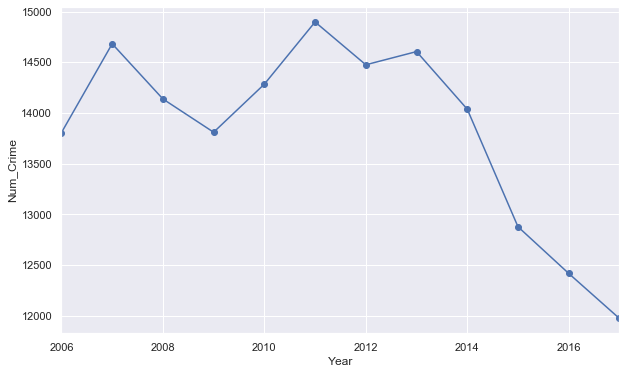

In [ ]:
ax = df1.plot(y="Num_Crime", legend=False, color="b", marker='o', figsize=(10, 6))
ax.set(xlabel="Year", ylabel="Num_Crime")
## Crime Data Try 1

[Text(0, 0.5, 'Num_Crime'), Text(0.5, 0, 'Year')]

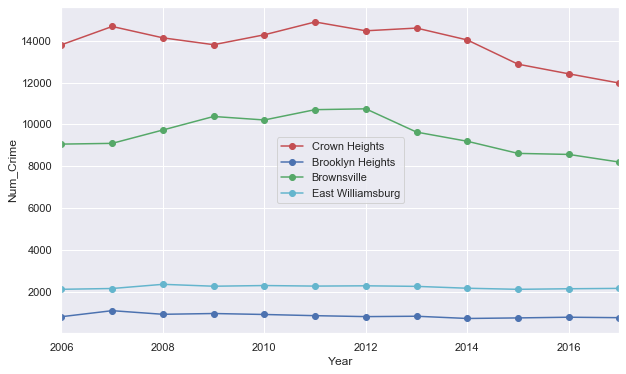

In [ ]:
# dfc = pd.merge(df1, df11)
dfc = pd.DataFrame({'Crown Heights':df1['Num_Crime'], 'Brooklyn Heights':df11['Num_Crime'], 'Brownsville':df12['Num_Crime'],
                  'East Williamsburg':df13['Num_Crime']})

ax = dfc.plot(y=['Crown Heights', 'Brooklyn Heights', 'Brownsville','East Williamsburg'], color=["r", "b", "g","c"], marker='o', figsize=(10, 6))
ax.set(xlabel="Year", ylabel="Num_Crime")

### Housing prices over the years in Crown Heights 
-General trend is an increase in the average housing prices over the years (2003-2017)
 - Increase in housing prices may be indicative of gentrification because the rise in house prices indicates the incoming of more affluent groups and will result in the relocation of the poor. 


[Text(0, 0.5, 'Average House Price'), Text(0.5, 0, 'Year')]

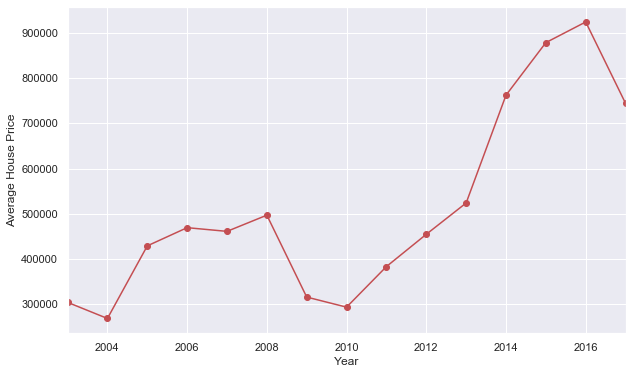

In [ ]:
ax = df2.plot(y="Avg_Price", legend=False, color="r", marker='o', figsize=(10, 6))
ax.set(xlabel="Year", ylabel="Average House Price")

[Text(0, 0.5, 'Average House Price'), Text(0.5, 0, 'Year')]

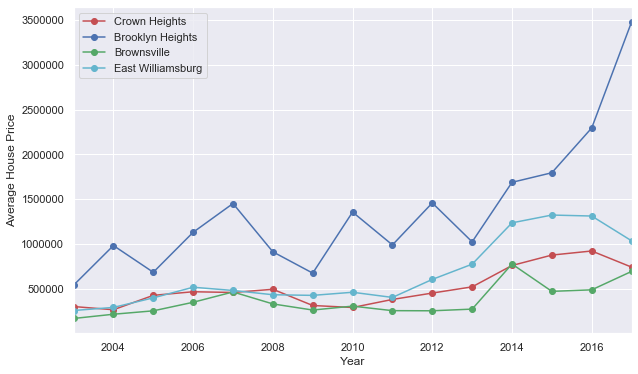

In [ ]:
# Not show in presentation
dfh = pd.merge(df2, df21)
dfh = pd.DataFrame({'Crown Heights':df2['Avg_Price'], 'Brooklyn Heights':df21['Avg_Price'], 'Brownsville':df22['Avg_Price'],
                  'East Williamsburg':df23['Avg_Price']})
# dfh.head()
ax = dfh.plot(y=['Crown Heights', 'Brooklyn Heights', 'Brownsville','East Williamsburg'], color=["r", "b", "g","c"], marker='o', figsize=(10, 6))
ax.set(xlabel="Year", ylabel="Average House Price")

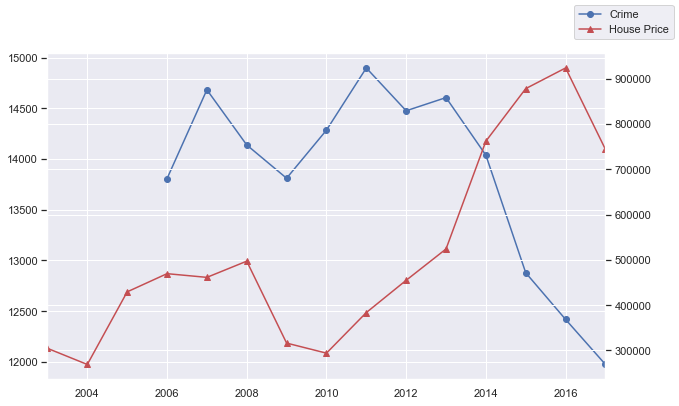

In [ ]:
# plt.plot(df)
ax = dfc.plot(y="Crown Heights", legend=False, marker='o')
ax2 = ax.twinx()
dfh.plot(y="Crown Heights", ax=ax2, legend=False, color="r", marker='^', figsize=(10, 6))
ax.figure.legend(['Crime','House Price'])
plt.show()
# plt.legend('ABCDEF', ncol=2, loc='upper left');

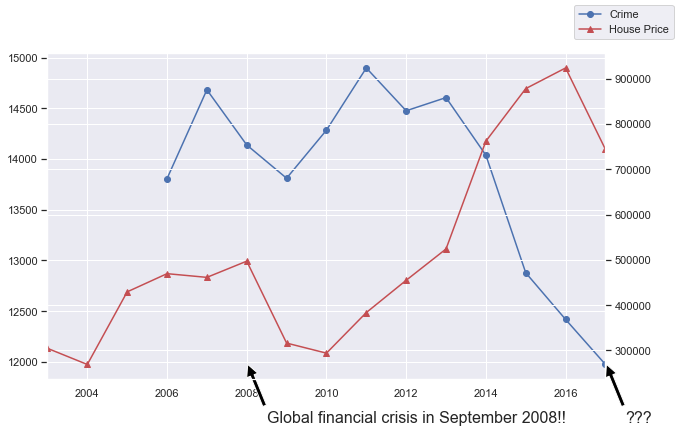

In [ ]:
ax = dfc.plot(y="Crown Heights", legend=False, marker='o')
ax2 = ax.twinx()
dfh.plot(y="Crown Heights", ax=ax2, legend=False, color="r", marker='^', figsize=(10, 6))
ax.figure.legend(['Crime','House Price'])

ax.annotate('Global financial crisis in September 2008!!', xy=(2008, 12000), xytext=(2008.5, 11400),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)
ax.annotate('???', xy=(2017, 12000), xytext=(2017.5, 11400),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

plt.show()

In [ ]:
dfd = df3.append(df4)
dfg = dfd.groupby('DBN')
# dfd.head()

### School demographic information
- The percentage of the students in poverty starts to  decrease in 2009. 
 -  This indicate gentrification as it implies the presence of more affluent and the displacement of lower-income families.
- The percentage of Hispanic, and white start increasing in the west of Crown Heights.
- There is a slight decrease in African Americans race.  
 -  This ethnic change/racial displacement is a common outcome of gentrification.

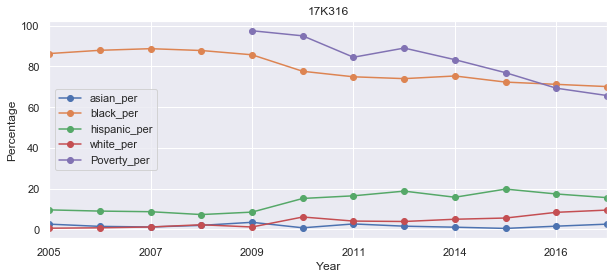

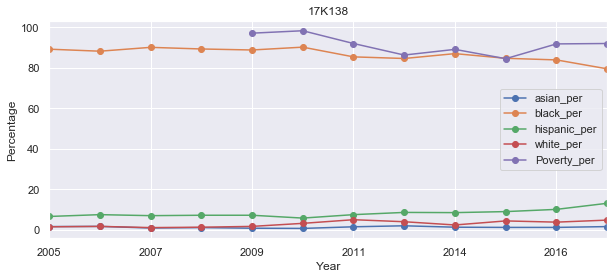

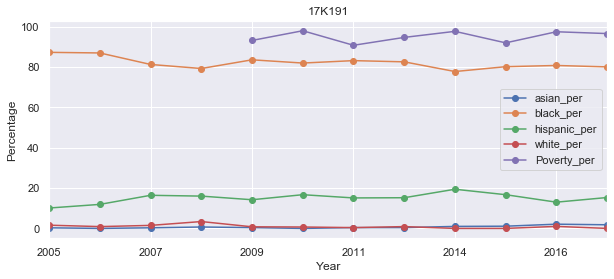

In [ ]:
# schoolList = ['17K316', '17K138', '17K289', '17K061', '17K191', '17K012', '17K770', '17K382', '17K006', '17K181']
schoolList = ['17K316', '17K138', '17K191']
for i in schoolList:
    s = dfg.get_group(i)
    ax = s.plot(x = 'schoolyear', y = ['asian_per', 'black_per','hispanic_per', 'white_per', 'Poverty_per'], 
                title = i, marker='o', figsize=(10, 4))
    ax.set(xlabel="Year", ylabel="Percentage")


## Conclusion
It does appear that gentrification has had a significant effect on crime rate, housing prices, and demographic changes.
The data suggest that there is a strong inverse relationship between housing prices and crime rates. 
Our data also indicates the gentrification is progressing from west to east across Crown Heights.
